### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BlZgEqdSjBdRqM9jeL7CtomwXFwbD', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--a846e08d-b090-4d83-b354-a7a4a308df5d-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen-qwq-32b")
llm_groq.invoke("Hey I am Krish and i like to play cricket")

AIMessage(content="\n<think>\nOkay, the user is Krish and he mentioned he likes to play cricket. I should respond in a friendly way. Let me start by welcoming him and acknowledging his interest in cricket. Maybe ask him some questions to keep the conversation going. I can ask about his favorite cricket positions, teams, or players. Also, it might be good to mention popular cricket leagues like the IPL to see if he follows those. I should make sure my tone is enthusiastic and approachable. Let me put that together in a natural way without making it sound like a list of questions. Keep it conversational.\n</think>\n\nHey Krish! Nice to meet you! 😊 Cricket is amazing—I love it too! Do you prefer batting, bowling, or fielding? And who's your favorite team or player? Bonus question: Do you follow the IPL? I’d love to hear more about what you enjoy most in the game!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 183, 'prompt_tokens': 20, 'total_tokens': 203, 

### We Will start With Creating Nodes

In [6]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

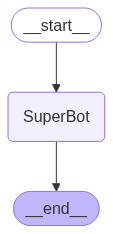

In [7]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [8]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is Krish And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='7162b790-7e90-4fae-a238-5a30d767de62'),
  AIMessage(content="\n<think>\nOkay, the user introduced themselves as Krish and mentioned they like cricket. I should respond warmly. Let me start by greeting them back and acknowledging their name and interest. Maybe ask if they follow any specific teams or players. Also, since they might be interested in a conversation, I can mention some popular cricket topics to keep the chat going. I should keep it friendly and open-ended. Let me check for any recent cricket events to reference, like the recent World Cup or tournaments. Wait, the user hasn't mentioned the current date, so maybe stick to general topics. Perhaps ask about their favorite cricketers or if they play themselves. Make sure the tone is positive and engaging.\n</think>\n\nHello Krish! Nice to meet you. That's a great interest—cricket is such an exciting sport

#### Streaming The responses

In [9]:
for event in graph_builder.stream({"messages":"Hello My name is KRish"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content='\n<think>\nOkay, the user said, "Hello My name is KRish." I need to respond appropriately. Let me start by greeting them back. "Hello KRish!" That\'s friendly. Then maybe ask how I can assist them today. Keep it simple and open-ended so they feel comfortable to explain what they need help with. Let me check for any typos or mistakes. Looks good. Alright, that should work.\n</think>\n\nHello KRish! Nice to meet you. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 103, 'prompt_tokens': 16, 'total_tokens': 119, 'completion_time': 0.241430509, 'prompt_time': 0.002928397, 'queue_time': 0.262791422, 'total_time': 0.244358906}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'stop', 'logprobs': None}, id='run--7e4ba4aa-598d-4378-9b86-4b97053ea8f4-0', usage_metadata={'input_tokens': 16, 'output_tokens': 103, 'total_tokens': 119})]}}
